Primero importamos las librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot  as plt
import seaborn as sns
import numpy as np

Ahora importamos los archivos csv

In [ ]:
happiness=pd.read_csv('data/Happines_report.csv')
meta=pd.read_csv('data/Metadata.csv')

print(happiness)
print(meta)

A partir del dataframe happiness obtén otro (mexico) donde únicamente almacenes la información de México. Haz que la columna Country or region quede como índice

In [ ]:
#creamos el dataframe tomando solo los valores de  mexico
mexico=happiness[happiness['Country or region']=='Mexico']
mexico.set_index('Country or region',inplace=True)
print(mexico)

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


Obtener un histograma del puntaje score con el dataframe happiness, adeamas de ubicar el valor de Mexico con una etiqueta

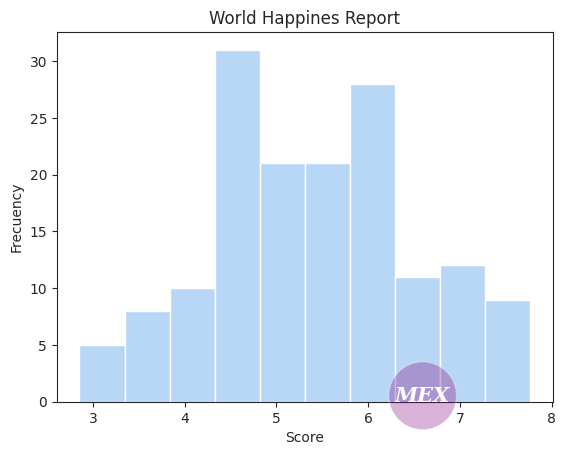

In [ ]:

#Paletas que use
sns.set_palette('pastel')
sns.set_style('ticks')

#Creamos el histograma con seaborn para dar un mejor diseño
#en este caso use 10 para que fuera un poco mas claro y coincidiera con el que
#venia en el documento de word
happines_hist=sns.histplot(happiness['Score'], bins=10, kde=False)

plt.title('World Happines Report')
plt.ylabel('Frecuency')
#usamos dos diccionarios para las propiedades del texto
font = {
        'family': 'serif',
         'size': 15,
         'weight': 'bold',
         'style': 'italic',
         'color': 'white',
         'horizontalalignment': 'center'
        }

box =   {
        'boxstyle': 'circle',
        'facecolor': 'purple',
        'alpha': 0.3
        }


#Generamos el texto ubicando a Mexico y colocamos 0 en el eje y, ademas agreamos
#los diccionarios con propiedades de texto
plt.text(mexico.loc['Mexico','Score'],0,'MEX', fontdict=font, bbox=box)


plt.show()

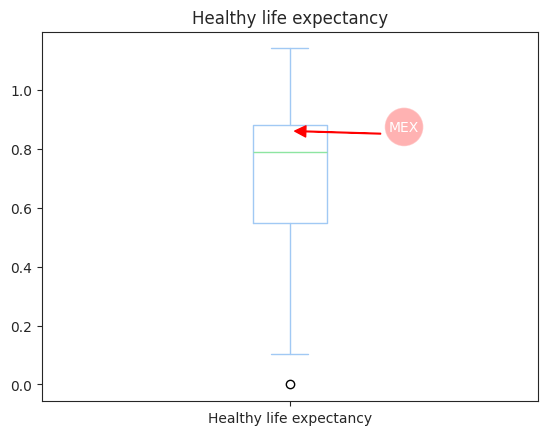

In [ ]:
#guardamos en valor de mexico en una variable
value=mexico.loc['Mexico','Healthy life expectancy']

#creamos el grafico usando pandas
happiness['Healthy life expectancy'].plot(kind='box')
plt.title('Healthy life expectancy')

#usamos un diccionario para las propiedades de la flecha
props_arrow = {
    'color':'red',
    'shrink':0.05,
    'width':0.5,
    'headwidth':8,
    'headlength':8
    }
#usamos un segundo diccionario con el cual veremos el texto
box2 =   {
        'boxstyle': 'circle',
        'facecolor': 'red',
        'alpha': 0.3
        }
# se crea la flecha ya agregamos sus
plt.annotate('MEX', xy=(1,value), xytext=(1.2,value), arrowprops=props_arrow,
               bbox=box2, color='white')
plt.show()

Crea una gráfica circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe mexico, obtenido anteriormente.

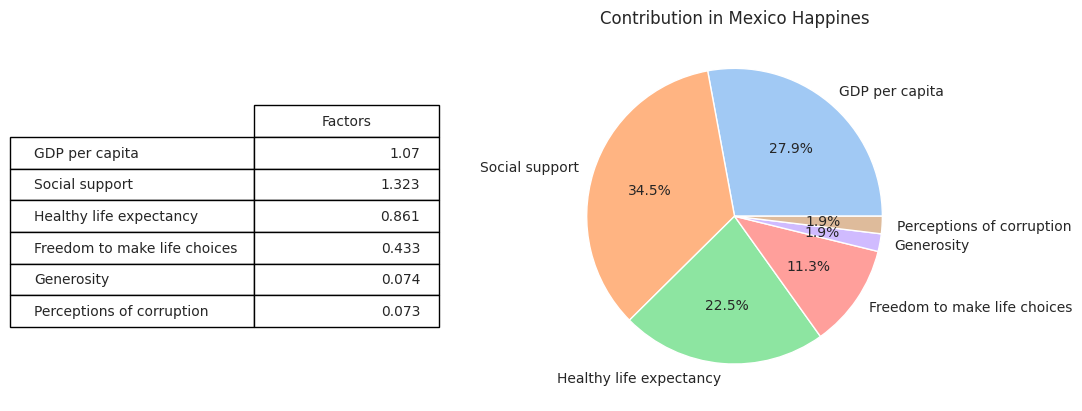

In [ ]:
#Modificamos el DF Mexico y lo guardamos en uno nuevo llamado mexico_new
#lo que hicimos fue borrarlas columnas overall y Score
mexico_new=mexico.drop(columns=['Overall rank','Score'])
#cambiamos la orientacion para poder graficar
mexico_new=mexico_new.T

#le asignamos un nombre a la columna de datos
mexico_new.columns=['Factors']

#graficamos la grafica de pastel
plt.pie(x=mexico_new['Factors'],labels=mexico_new.index,
        autopct='%1.1f%%')

plt.title('Contribution in Mexico Happines')
#creamos la tabla de datos y la enviamos a la izquierda como en el documento
table=plt.table(mexico_new, bbox=[-0.8, 0.2, 0.5, 0.6])


plt.show()


Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

Country or region             Finland  Germany  United States  Mexico  \
GDP per capita                  1.340    1.373          1.433   1.070   
Social support                  1.587    1.454          1.457   1.323   
Healthy life expectancy         0.986    0.987          0.874   0.861   
Freedom to make life choices    0.596    0.495          0.454   0.433   
Generosity                      0.153    0.261          0.280   0.074   
Perceptions of corruption       0.393    0.265          0.128   0.073   

Country or region             South Sudan  
GDP per capita                      0.306  
Social support                      0.575  
Healthy life expectancy             0.295  
Freedom to make life choices        0.010  
Generosity                          0.202  
Perceptions of corruption           0.091  


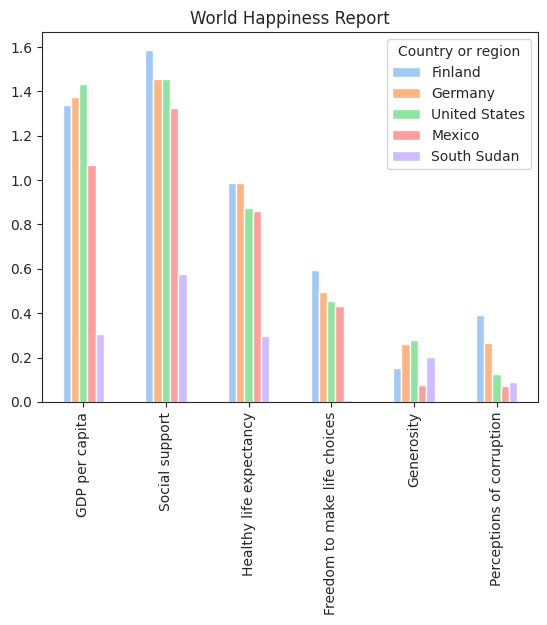

In [ ]:
#Cree el DF countries , en el cual tome los valores de los paises o region mas
#del valor mas alto y el mas bajo, ademas de mexico y 2 paises mas
countries=happiness.loc[(happiness['Score']==happiness['Score'].max())|
                        (happiness['Country or region']=='Mexico')|
                        (happiness['Score']==happiness['Score'].min())|
                        (happiness['Country or region']=='Germany')|
                        (happiness['Country or region']=='United States')]

countries.set_index('Country or region', inplace=True)

countries=countries.drop(columns=['Score','Overall rank'])
countries=countries.T

print(countries)
#crea la grafica con pandas
countries.plot(kind='bar', title='World Happiness Report')

plt.show()

Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (score) versus los 6 factores, para determinar qué factor influye más en la evaluación.

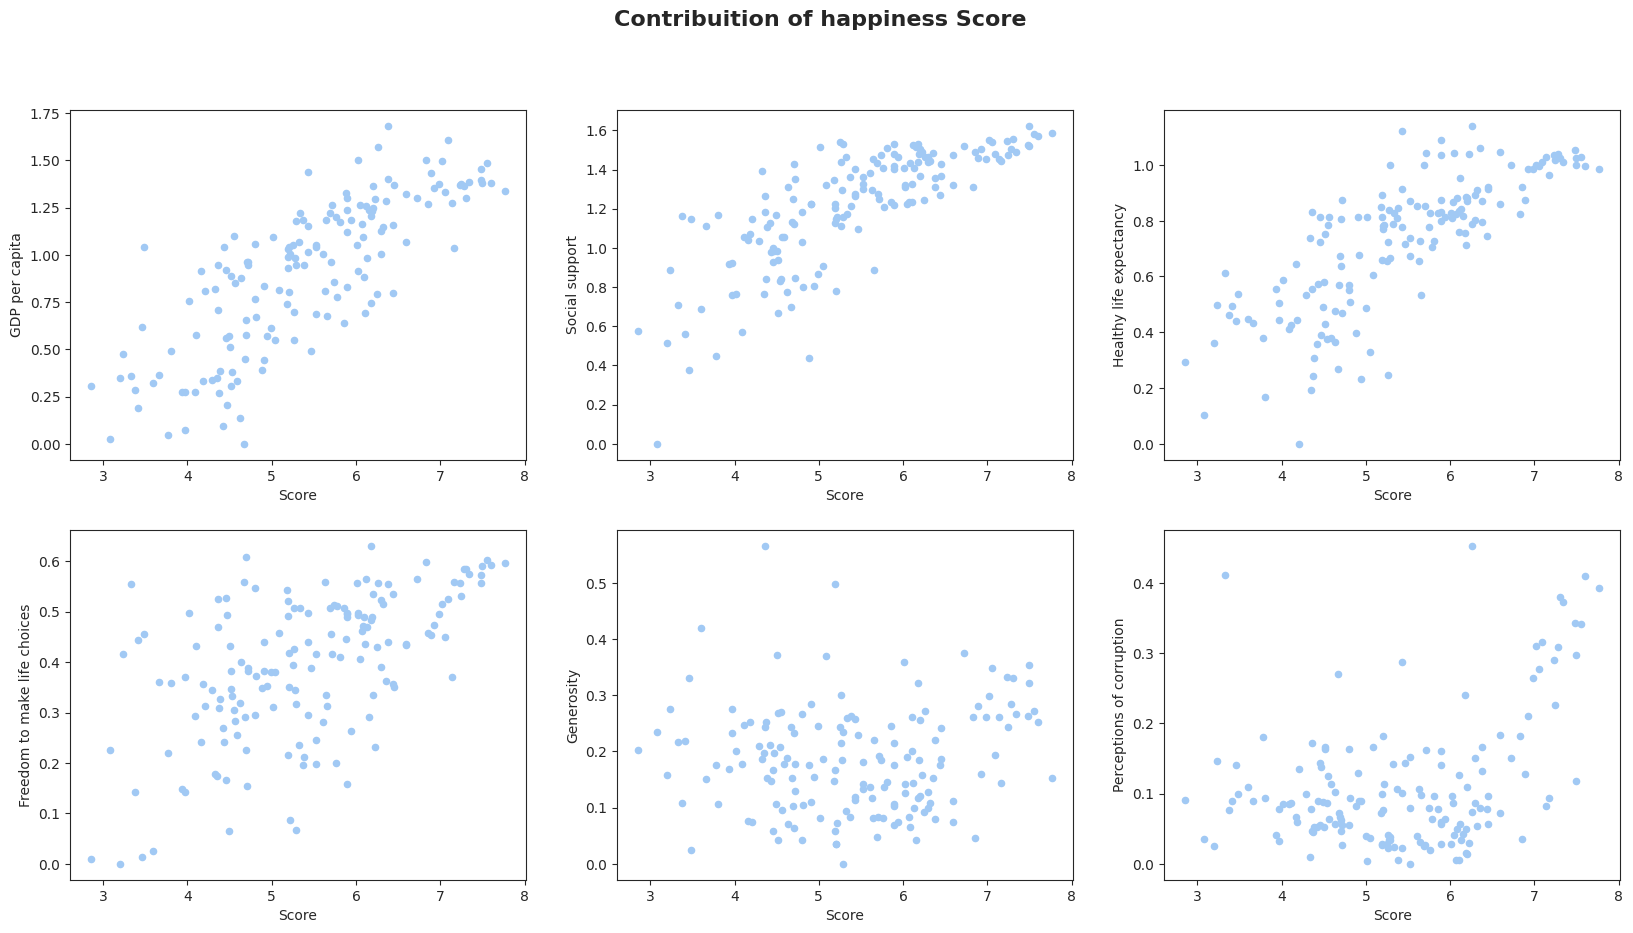

In [ ]:
fig = plt.figure(figsize=(20,10))


ax1 = fig.add_subplot(231)
happiness.plot(kind='scatter',x='Score' ,y='GDP per capita', ax=ax1)

ax2 = fig.add_subplot(232)
happiness.plot(kind='scatter',x='Score' ,y='Social support', ax=ax2)

ax3 = fig.add_subplot(233)
happiness.plot(kind='scatter',x='Score' ,y='Healthy life expectancy', ax=ax3)

ax4 = fig.add_subplot(234)
happiness.plot(kind='scatter',x='Score' ,y='Freedom to make life choices', ax=ax4)

ax5 = fig.add_subplot(235)
happiness.plot(kind='scatter',x='Score' ,y='Generosity', ax=ax5)

ax6 = fig.add_subplot(236)
happiness.plot(kind='scatter',x='Score' ,y='Perceptions of corruption', ax=ax6)

fig.suptitle('Contribuition of happiness Score', fontsize=16, fontweight='bold')

plt.show()

a

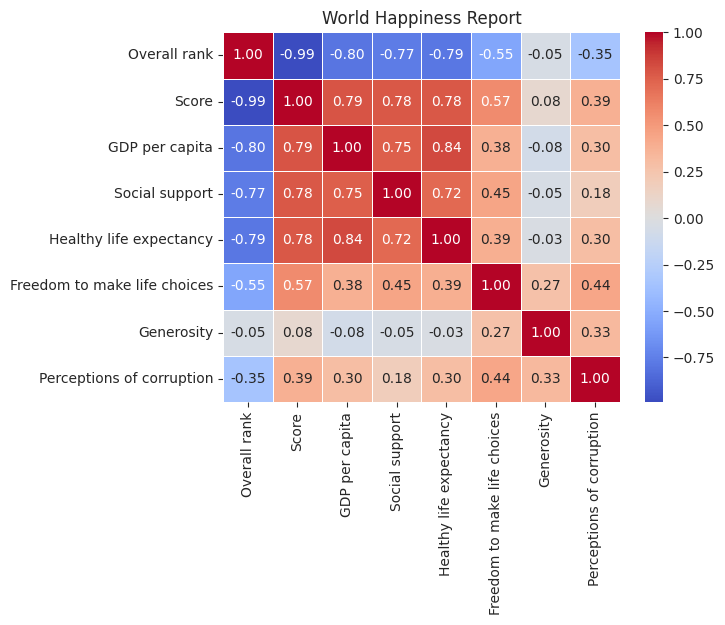

In [ ]:
#sacamos su porcentaje de correlacion
corr = happiness.drop(columns='Country or region').corr()

#construimos el grafico de tipo  heatmap

sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

plt.title('World Happiness Report')
plt.show()

Combina con el dataframe metada (Metadata.csv) para graficar la felicidad promedio por región.

Region
East Asia & Pacific           5.339
Europe & Central Asia         6.058
Latin America & Caribbean     6.105
Middle East & North Africa    5.773
North America                 7.085
South Asia                    4.456
Sub-Saharan Africa            4.374
Name: Score, dtype: float64


<ipython-input-44-76c5977eb5c9>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group.index, y='Score', data=group, palette='pastel')


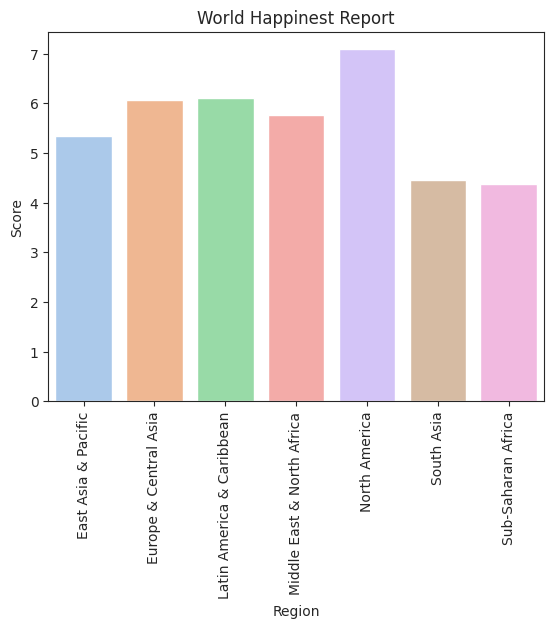

In [ ]:
#se combina el DF con la columna table name y country region ya que son las unicas concidentes
happines_Region=meta.merge(happiness,left_on='TableName', right_on='Country or region' )

#creamos otro df que saque el promedio por region del score de felicidad usando la funcion median
group =happines_Region[['Score','Region']].groupby('Region').median()
print(group['Score'])

sns.barplot(x=group.index, y='Score', data=group, palette='pastel')
plt.xticks(rotation=90)
plt.title('World Happinest Report')
plt.show()